In [9]:
import pandas as pd
import matplotlib.pyplot as plt

__Select dataframes:__

In [16]:
# Reading dataframes
df1 = pd.read_csv(r'datasets/IR Dec24_60min.csv')
df2 = pd.read_csv(r'datasets/XT Dec24_60min.csv')

In [18]:
# Create a DataFrame
df = pd.DataFrame()
df['c1'] = df1['Close']
df['c2'] = df2['Close']

In [19]:
df.head()

,c1,c2
0,95.84,96.178
1,95.85,96.174
2,95.85,96.170
3,95.85,96.176
4,95.84,96.185


In [23]:
df.corr()

,c1,c2
c1,1.000000,0.905322
c2,0.905322,1.000000


__Enter rolling window:__

In [21]:
# Enter window
w = 10

In [33]:
# Calculate the rolling correlation with a window of 10
rolling_corr = df['c1'].rolling(window=10).corr(df['c2'])

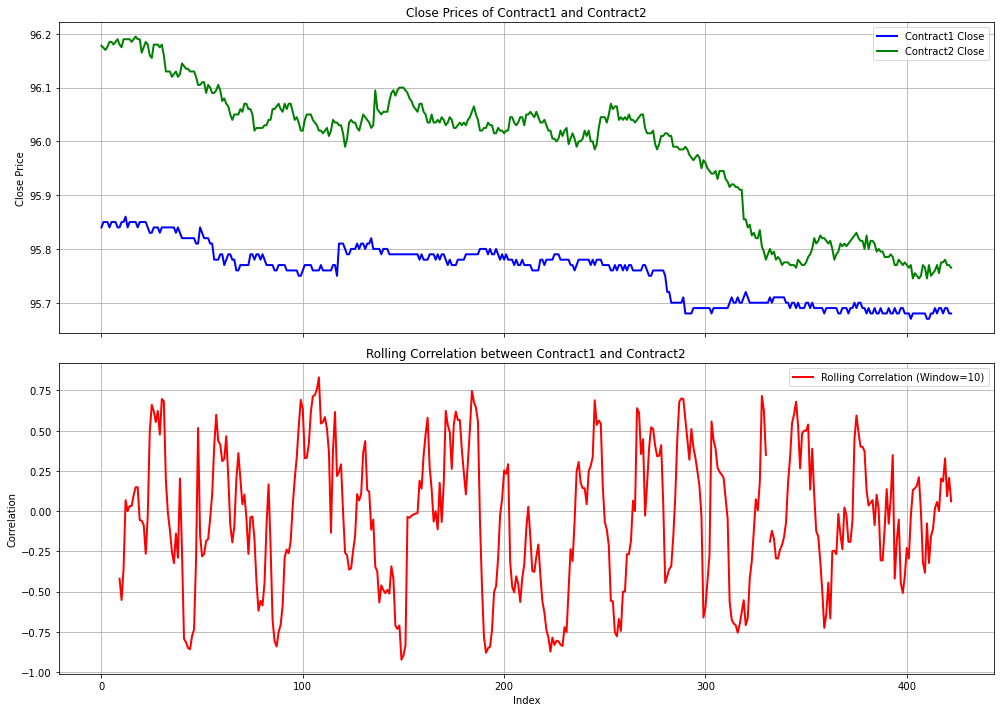

In [34]:
# Plot the close prices and rolling correlation
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot Contract1 and Contract2 close prices
ax[0].plot(df['c1'], label='Contract1 Close', color='b', linewidth=2)
ax[0].plot(df['c2'], label='Contract2 Close', color='g', linewidth=2)
ax[0].set_title('Close Prices of Contract1 and Contract2')
ax[0].set_ylabel('Close Price')
ax[0].legend()
ax[0].grid(True)

# Plot the rolling correlation
ax[1].plot(rolling_corr, label=f"Rolling Correlation (Window={w})", color='r', linewidth=2)
ax[1].set_title('Rolling Correlation between Contract1 and Contract2')
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Correlation')
ax[1].legend()
ax[1].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

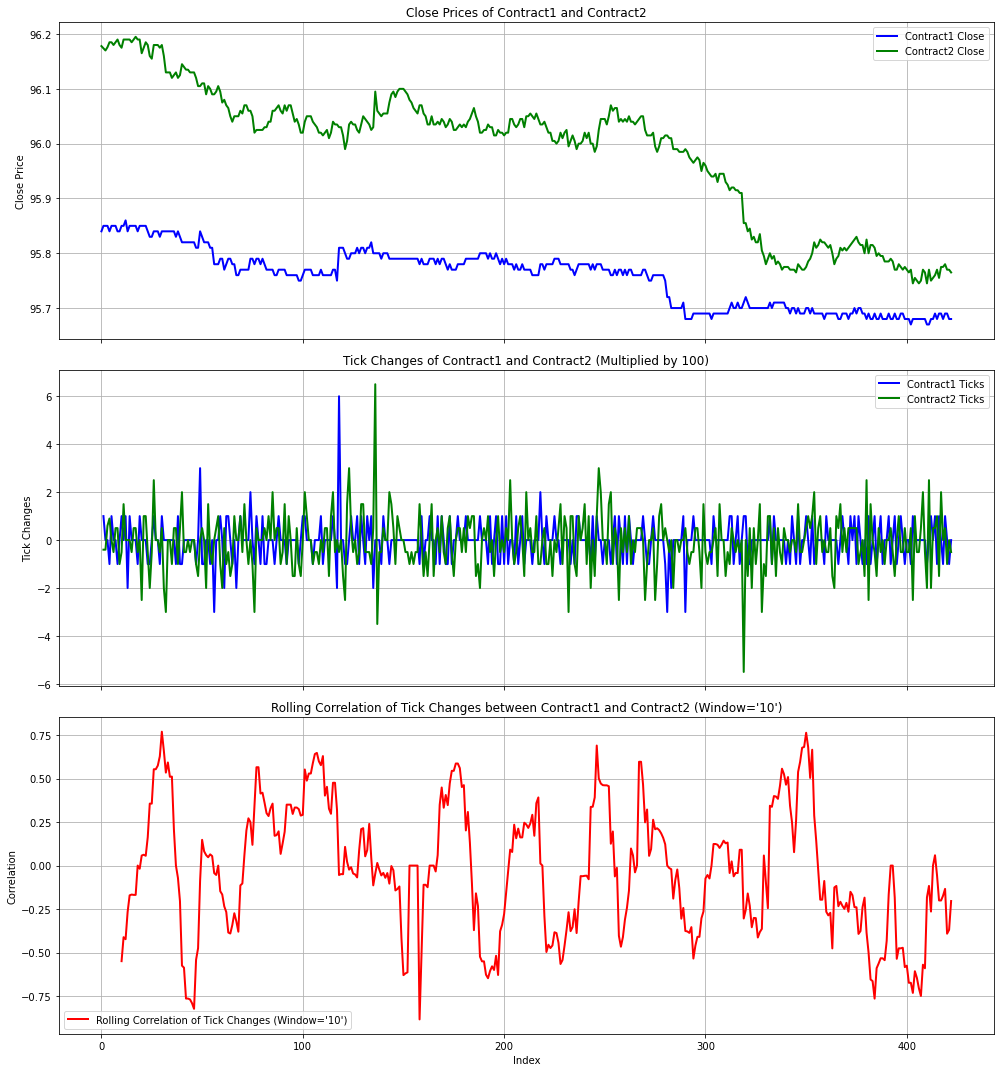

In [38]:
# Calculate the tick changes (differences) and multiply by 100
df['Contract1_Ticks'] = df['c1'].diff() * 100
df['Contract2_Ticks'] = df['c2'].diff() * 100

# Calculate the rolling correlation of tick changes
rolling_corr_ticks = df['Contract1_Ticks'].rolling(window=w).corr(df['Contract2_Ticks'])

# Plotting close prices, tick changes, and rolling correlation of tick changes
fig, ax = plt.subplots(3, 1, figsize=(14, 15), sharex=True)

# Plot Contract1 and Contract2 close prices
ax[0].plot(df['c1'], label='Contract1 Close', color='b', linewidth=2)
ax[0].plot(df['c2'], label='Contract2 Close', color='g', linewidth=2)
ax[0].set_title('Close Prices of Contract1 and Contract2')
ax[0].set_ylabel('Close Price')
ax[0].legend()
ax[0].grid(True)

# Plot Contract1 and Contract2 tick changes
ax[1].plot(df['Contract1_Ticks'], label='Contract1 Ticks', color='b', linewidth=2)
ax[1].plot(df['Contract2_Ticks'], label='Contract2 Ticks', color='g', linewidth=2)
ax[1].set_title('Tick Changes of Contract1 and Contract2 (Multiplied by 100)')
ax[1].set_ylabel('Tick Changes')
ax[1].legend()
ax[1].grid(True)

# Plot the rolling correlation of tick changes
ax[2].plot(rolling_corr_ticks, label=f"Rolling Correlation of Tick Changes (Window='{w}')", color='r', linewidth=2)
ax[2].set_title(f"Rolling Correlation of Tick Changes between Contract1 and Contract2 (Window='{w}')")
ax[2].set_xlabel('Index')
ax[2].set_ylabel('Correlation')
ax[2].legend()
ax[2].grid(True)

# Show the plot
plt.tight_layout()
plt.show()
